In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import importlib

import interpolation_runner as ip
import file_handler as fh

In [3]:
#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(-100, 100, 10)
lamdas = np.linspace(0,1,12)
T_L = 10
T_R = 1

if T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L

INPUT = {
    'omega': 0.09,
    'u_intra': 500,
    'u_inter': 300,
    'V_B': 40,
    'gammaL': 0.1,
    'gammaR': 0.105,
    'T_L': T_L,
    'T_R': T_R,
}
       


In [4]:

I, I_var, J_QH, P, eff, sigma, TUR = ip.run_interpolation(epsilons, lamdas, **INPUT)

In [5]:
importlib.reload(fh)
fh.save_file(I, I_var, J_QH, P, eff, sigma, TUR, epsilons, lamdas, INPUT)


Existing one: (240, 17)
combined one one: (360, 17)
After dropping duplicates: (360, 17)


In [6]:
'''
# Read the CSV file into a DataFrame
df = pd.read_csv('results.csv')

# Find the minimum TUR value
min_tur_value = df['TUR'].min()

# Filter the DataFrame for all rows with the lowest TUR value
min_tur_rows = df[df['TUR'] == min_tur_value]

print(min_tur_rows)
'''

# Read the CSV file into a DataFrame
df = pd.read_csv('latest_results.csv')
# Get the 10 lowest TUR values
lowest_tur_rows = df.nsmallest(20, 'TUR')

print(lowest_tur_rows)


       epsilon    lambda        TUR         I     I_var      J_QH         P  \
116  33.333333  1.000000   8.355640  0.000931  0.000923  0.050111  0.037252   
106  33.333333  0.909091   8.362531  0.000842  0.000835  0.045322  0.033687   
96   33.333333  0.818182   8.371638  0.000746  0.000740  0.040136  0.029828   
86   33.333333  0.727273   8.384303  0.000643  0.000638  0.034595  0.025706   
76   33.333333  0.636364   8.402274  0.000535  0.000531  0.028789  0.021387   
6    33.333333  0.000000   8.416401  0.000014  0.000014  0.000779  0.000580   
66   33.333333  0.545455   8.427892  0.000425  0.000422  0.022869  0.016982   
56   33.333333  0.454545   8.464547  0.000316  0.000315  0.017057  0.012660   
46   33.333333  0.363636   8.517959  0.000216  0.000215  0.011653  0.008641   
36   33.333333  0.272727   8.599477  0.000130  0.000129  0.007006  0.005188   
26   33.333333  0.181818   8.732107  0.000064  0.000064  0.003472  0.002564   
16   33.333333  0.090909   8.900713  0.000025  0.000

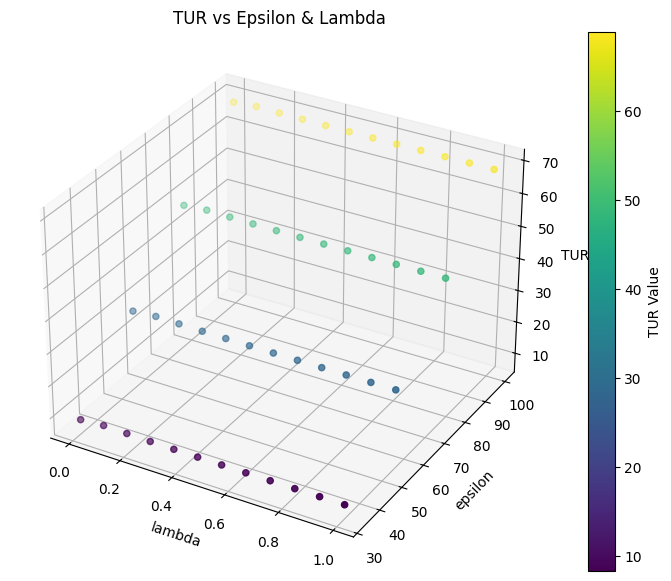

In [7]:
#Plotting from dataframe

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(df['lambda'], df['epsilon'], df['TUR'], c=df['TUR'], cmap='viridis')

# Labels
ax.set_xlabel('lambda')
ax.set_ylabel('epsilon')
ax.set_zlabel('TUR')

# Add color bar
plt.colorbar(sc, label="TUR Value")

plt.title("TUR vs Epsilon & Lambda")
plt.show()

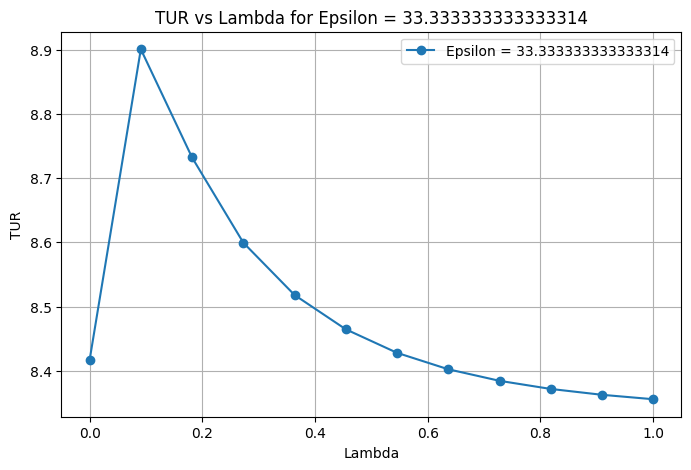

In [8]:
# Remove rows where TUR is NaN
df_clean = df.dropna(subset=['TUR'])

# Find the lowest epsilon where TUR is not NaN
min_epsilon_with_tur = df_clean['epsilon'].min()

# Filter the DataFrame for this lowest epsilon
df_filtered = df_clean[df_clean['epsilon'] == min_epsilon_with_tur]

# Plot TUR vs lambda for the lowest epsilon with TUR values
plt.figure(figsize=(8, 5))
plt.plot(df_filtered['lambda'], df_filtered['TUR'], marker='o', linestyle='-', label=f"Epsilon = {min_epsilon_with_tur}")

# Labels and title
plt.xlabel("Lambda")
plt.ylabel("TUR")
plt.title(f"TUR vs Lambda for Epsilon = {min_epsilon_with_tur}")
plt.legend()
plt.grid()

# Show plot
plt.show()

In [15]:
df_total = pd.read_csv('results.csv')
# Get the 10 lowest TUR values
lowest_turs = df_total.nsmallest(5, 'TUR')

# Build filter conditions dynamically
filter_conditions = True
for param, value in INPUT.items():
    filter_conditions &= (df[param] == value)

# Filter the DataFrame using the generated conditions
filtered_df = df[filter_conditions]

print(lowest_turs)
print("~~~~~|     |     |   |      |   ~~~~~")
print((filtered_df.nsmallest(10, 'TUR')))

       epsilon    lambda       TUR         I     I_var      J_QH         P  \
116  33.333333  1.000000  3.292137  0.000521  0.000584  0.030650  0.026053   
236  33.333333  1.000000  3.292144  0.000534  0.000598  0.031400  0.026691   
226  33.333333  0.909091  3.298091  0.000483  0.000540  0.028409  0.024145   
106  33.333333  0.909091  3.298879  0.000471  0.000527  0.027728  0.023566   
126  33.333333  0.000000  3.299658  0.000011  0.000013  0.000657  0.000558   

          eff     sigma  omega  u_intra  u_inter  V_B  gammaL  gammaR  T_L  \
116  0.850032  0.001532  0.105      500      300   50     0.1   0.100   10   
236  0.850032  0.001569  0.105      500      300   50     0.1   0.105   10   
226  0.849910  0.001423  0.105      500      300   50     0.1   0.105   10   
106  0.849893  0.001389  0.105      500      300   50     0.1   0.100   10   
126  0.850227  0.000033  0.105      500      300   50     0.1   0.105   10   

     T_R  
116    1  
236    1  
226    1  
106    1  
126    

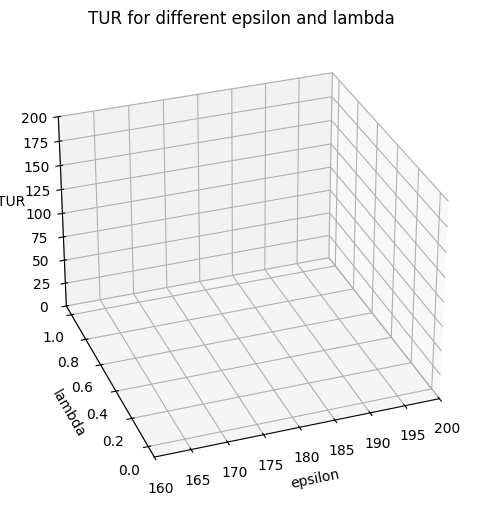

In [9]:
#3D - plot

Epsilon, Lamda = np.meshgrid(epsilons, lamdas)    # Create a 2D grid

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Epsilon, Lamda, TUR, cmap='viridis')

# Labels
ax.set_xlabel('epsilon')
ax.set_ylabel('lambda')
ax.set_zlabel('TUR')
ax.set_title('TUR for different epsilon and lambda')
ax.set_xlim(160, 200)
ax.set_zlim(0, 200)
#ax.view_init(elev=-90, azim=120)
ax.view_init(azim=-110)

plt.show()

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=TUR, x=Epsilon, y=Lamda, colorscale="viridis")])

# Labels
fig.update_layout(
    title="TUR for different epsilon and lambda",
    scene=dict(
        #xaxis_title="epsilon",
        #yaxis_title="lambda",
        #zaxis_title="TUR"
        xaxis=dict(title="epsilon", range=[160, 200]),  # X-axis limits
        yaxis=dict(title="lambda", range=[0, 1]),  # Y-axis limits
        zaxis=dict(title="T", range=[0, 200])  # Z-axis remains auto-scaled
    )
)

# Show the interactive plot
fig.show()



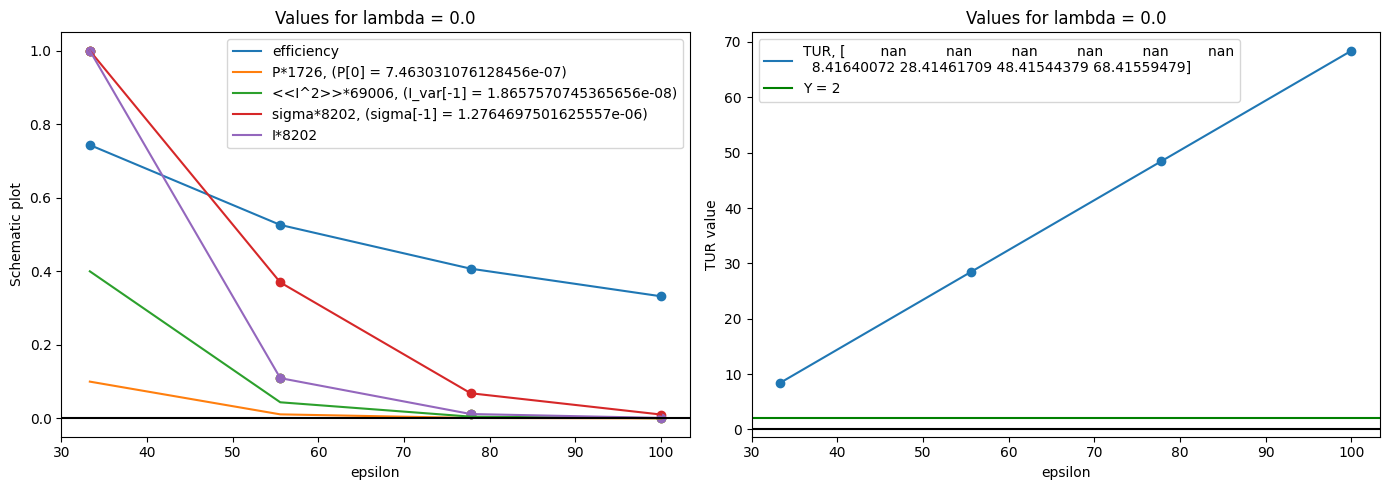

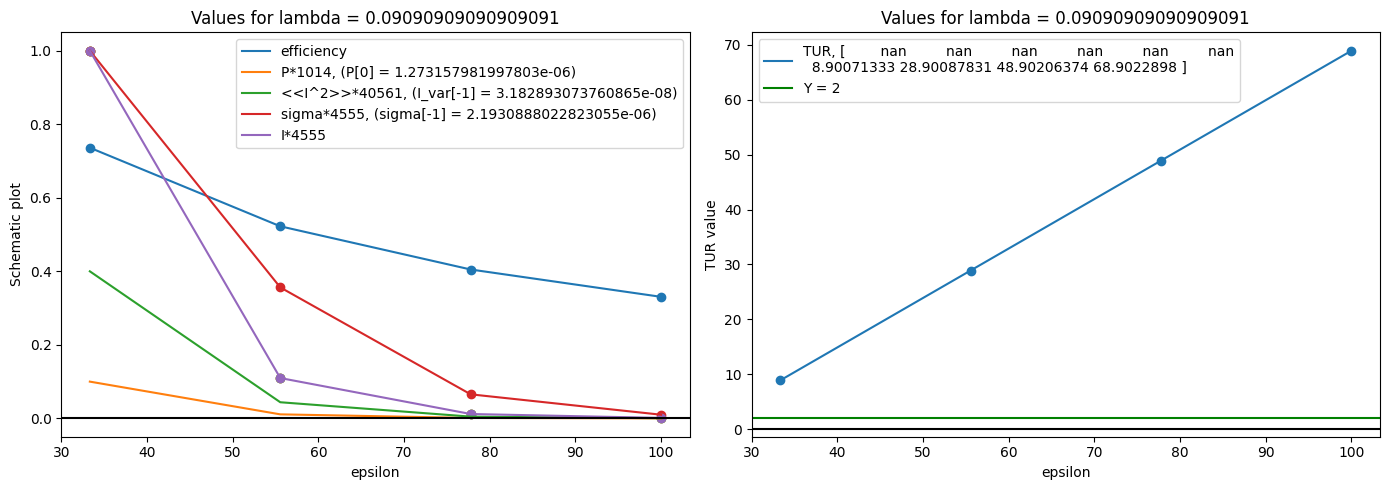

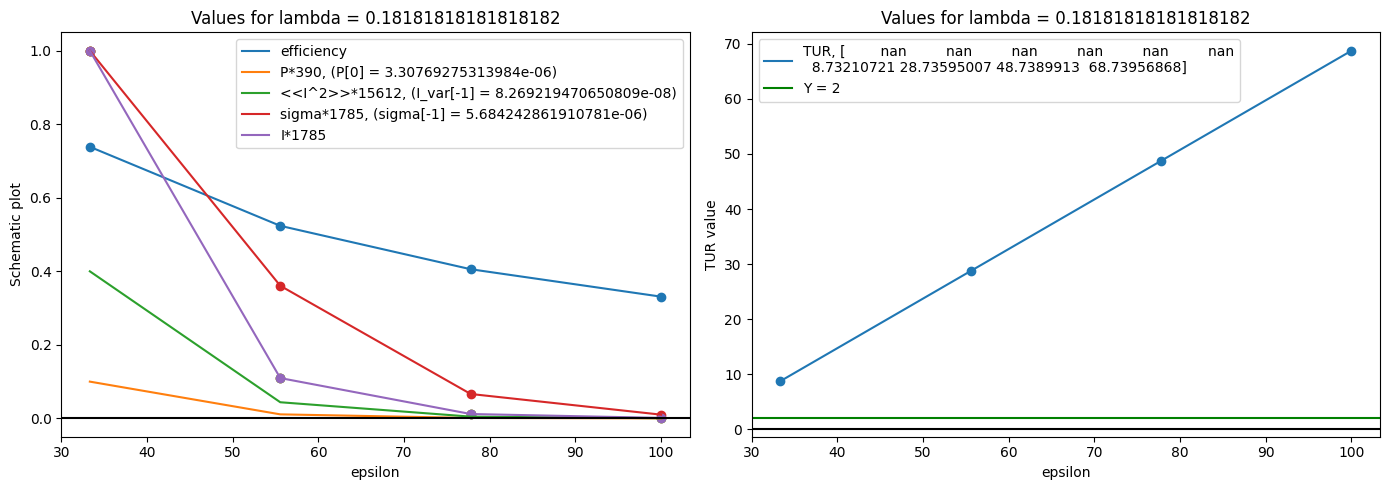

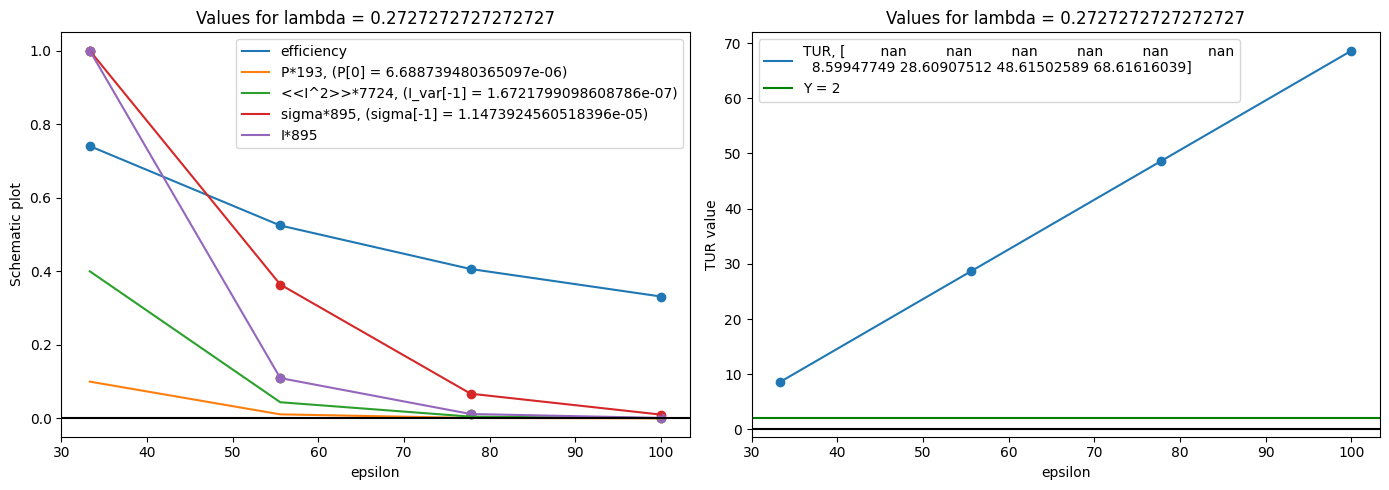

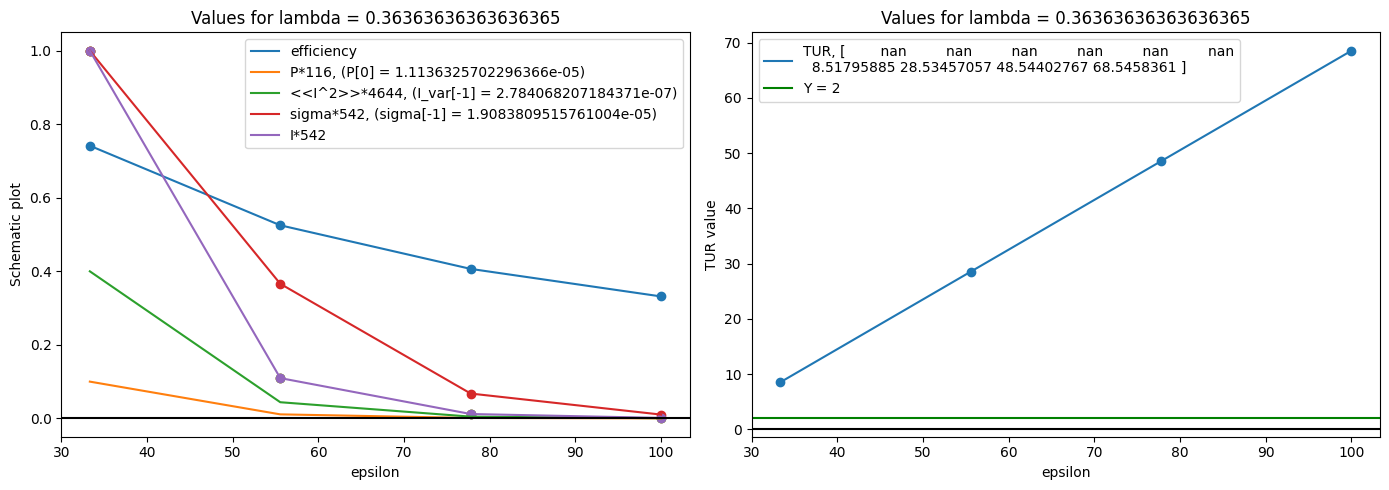

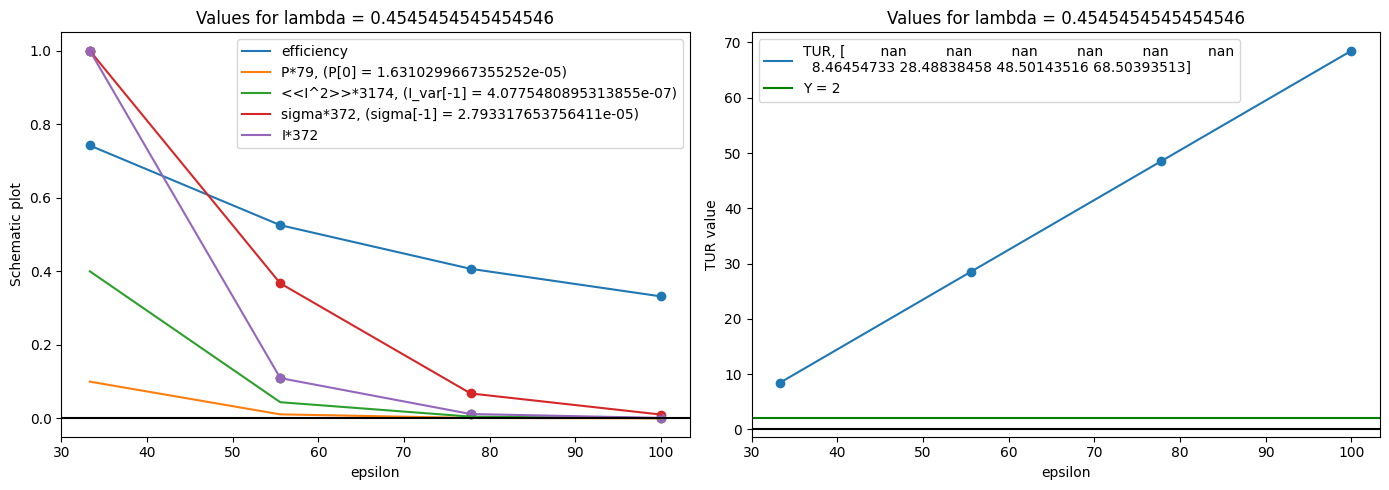

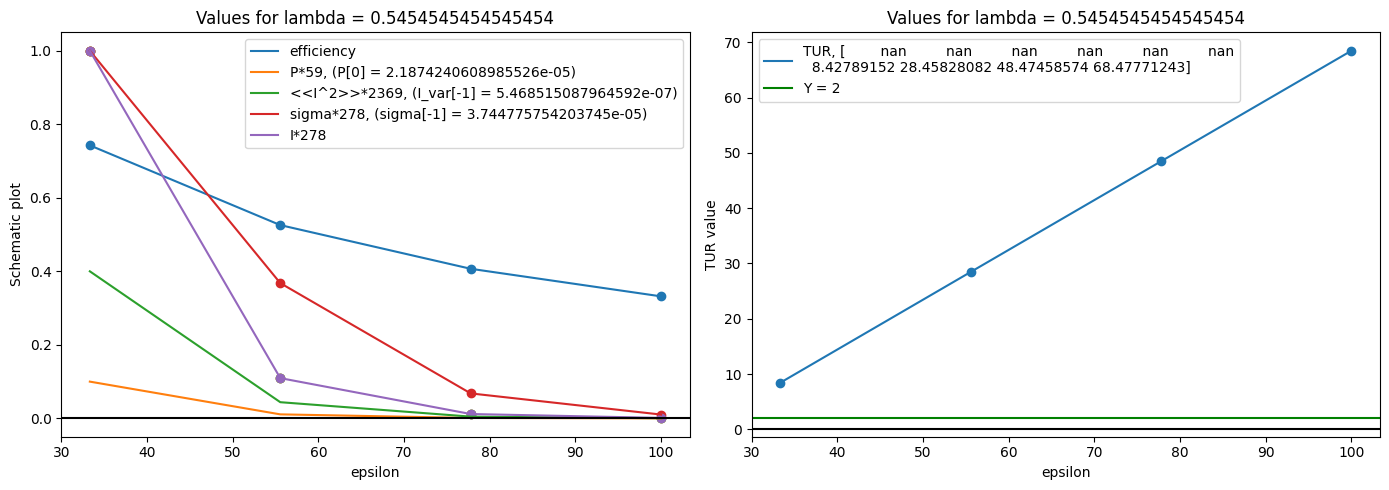

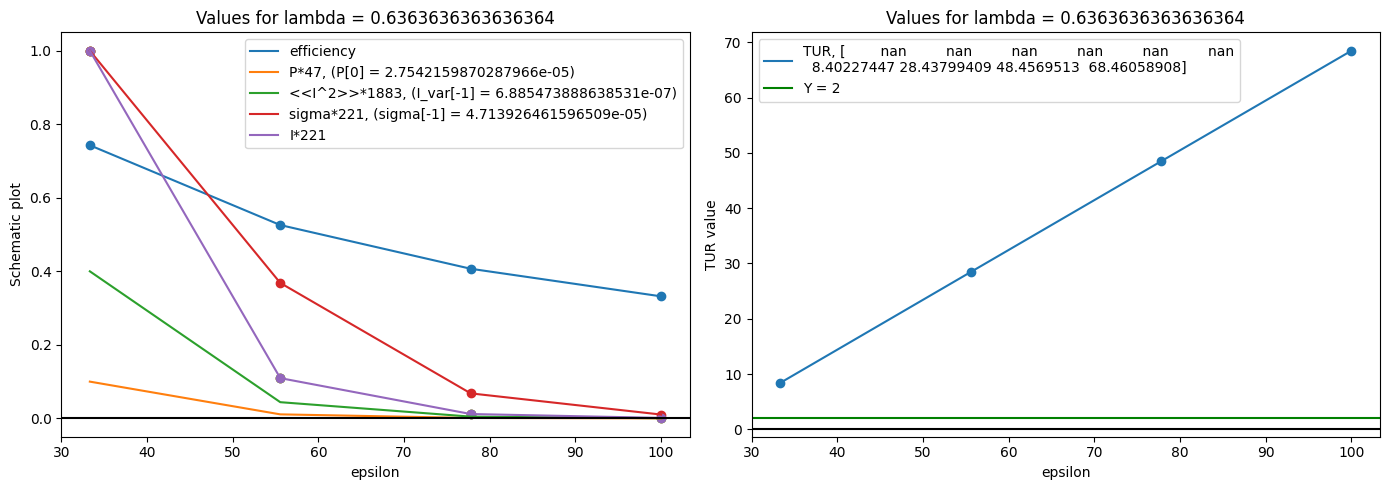

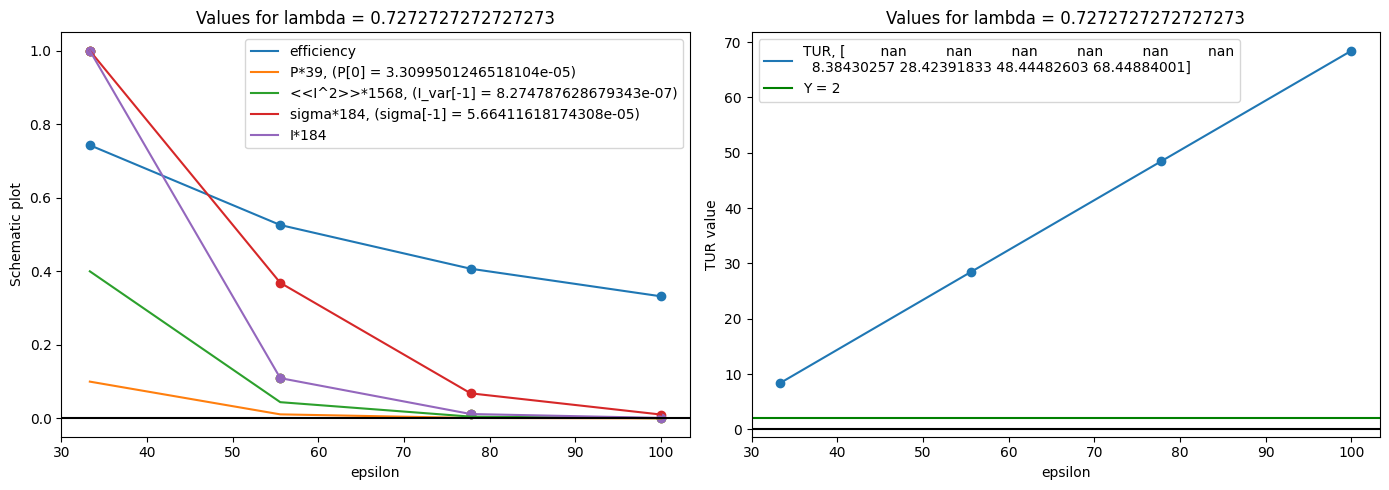

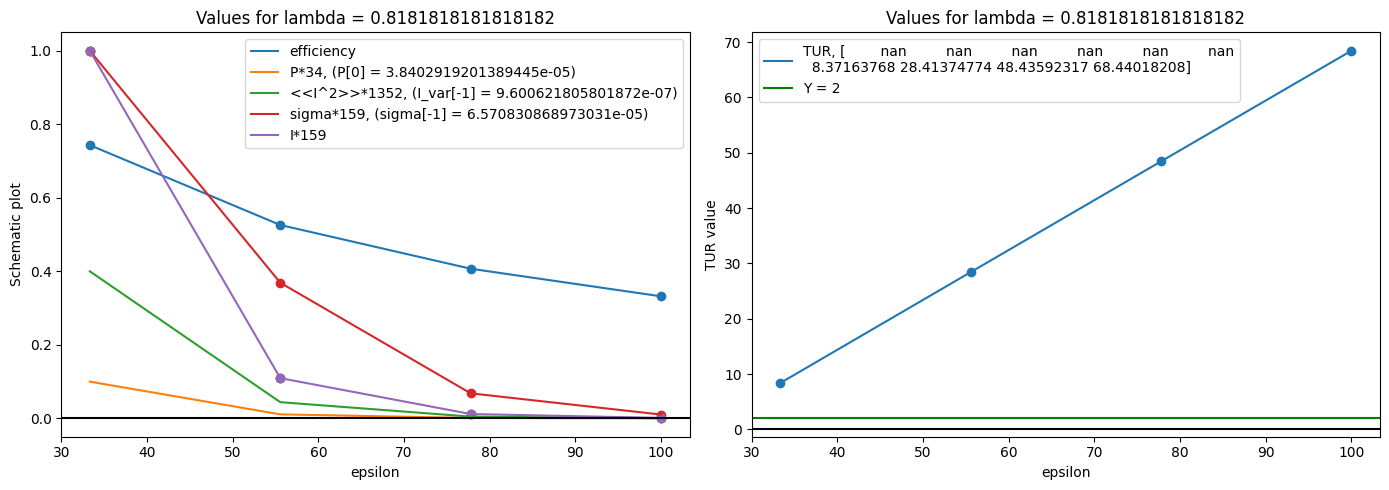

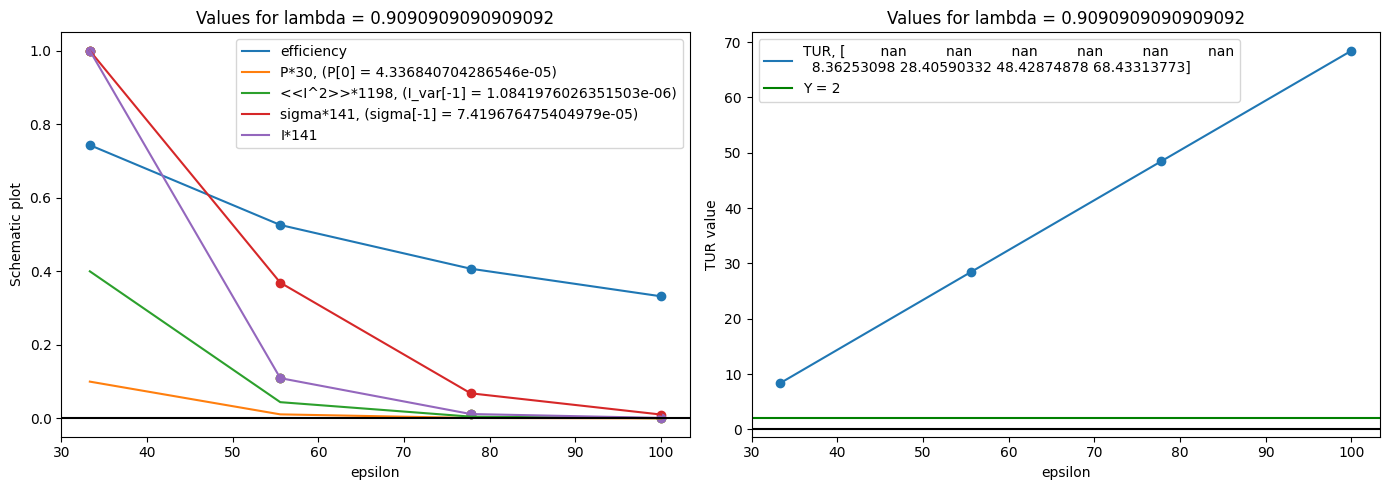

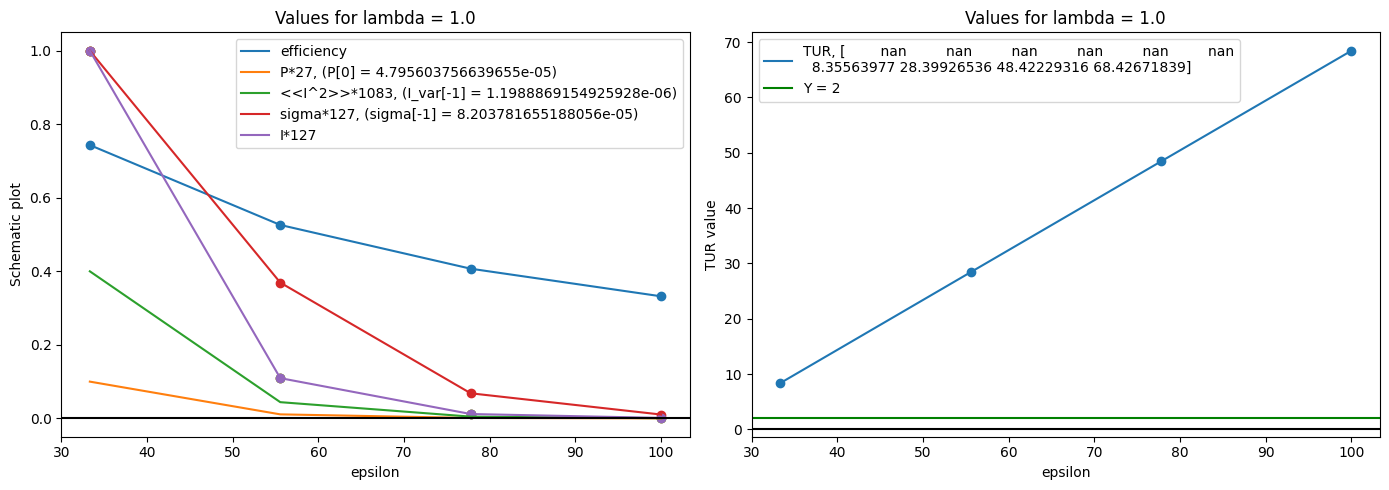

In [10]:
#---------plotting----------------------------------
for idx, lmda in enumerate(lamdas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

    def get_mult(matrix):
        max = 0
        for e_idx, _ in enumerate(epsilons):
            if matrix[idx, e_idx] > max:
                max = matrix[idx, e_idx]
        return 1/max 


    ax1.plot(epsilons, eff[idx], label='efficiency')
    ax1.scatter(epsilons, eff[idx])
    ax1.plot(epsilons, 0.1*get_mult(P)*P[idx], label=f'P*{round(get_mult(P))}, (P[0] = {P[idx][-1]})')
    ax1.scatter(epsilons, get_mult(P)*P[idx])
    ax1.plot(epsilons, 0.4*get_mult(I_var)*I_var[idx], label=f'<<I^2>>*{round(get_mult(I_var))}, (I_var[-1] = {I_var[idx][-1]})')
    ax1.scatter(epsilons, get_mult(I_var)*I_var[idx])
    ax1.plot(epsilons, get_mult(sigma)*sigma[idx], label=f'sigma*{round(get_mult(sigma))}, (sigma[-1] = {sigma[idx][-1]})')
    ax1.scatter(epsilons, get_mult(sigma)*sigma[idx])
    ax1.plot(epsilons, get_mult(I)*I[idx], label=f'I*{round(get_mult(sigma))}')
    ax1.scatter(epsilons, get_mult(I)*I[idx])
    
    #ax1.scatter(epsilons, J_QH[idx], label=f'J_QH, 0: {J_QH[idx][0]}, 1: {J_QH[idx][1]}, 2: {J_QH[idx][2]} , 3: {J_QH[idx][3]}, 4: {J_QH[idx][4]}, 5: {J_QH[idx][5]}, 6: {J_QH[idx][6]}')
    ax1.axhline(y=0, color='black', linestyle='-')
    #ax1.set_ylim(-0.01, 0.01)
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('Schematic plot')
    ax1.set_title(f'Values for lambda = {lmda}')
    ax1.legend()

    ax2.plot(epsilons, TUR[idx], label=f'TUR, {TUR[idx]}')
    ax2.scatter(epsilons, TUR[idx])
    ax2.set_title(f'Values for lambda = {lmda}')
    ax2.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
    ax2.axhline(y=0, color='black', linestyle='-')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('TUR value')
    ax2.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

I: (12, 10)
meshgrid:
epsilon: (12, 10)
lamda: (12, 10)


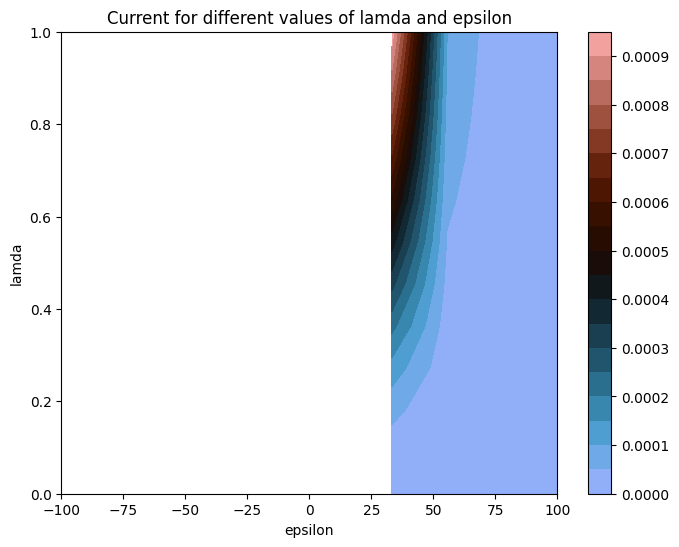

In [11]:
# Plotting of the cummulants

# Create a mesh grid
epsilon, lamda = np.meshgrid(epsilons, lamdas)
print('I:',I.shape)
print('meshgrid:')
print('epsilon:', epsilon.shape)
print('lamda:', lamda.shape)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, lamda, I, 20, cmap='berlin')  # Adjust number of contour levels as needed
#contour = plt.pcolormesh(epsilon, lamda, I, shading='auto', cmap='viridis')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('lamda')
plt.title('Current for different values of lamda and epsilon')
plt.show()